In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [134]:
response = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
soup = BeautifulSoup(response,"lxml")
Table = soup.find("table",{"class": "wikitable sortable"})

In [135]:
column_names = ['Name','Population','Area','Major_district',"num","flag","dense","kanji"]
tokyo = pd.DataFrame(columns = column_names)

In [136]:
Table.findAll("tr") 

[<tr>
 <th>No.
 </th>
 <th class="unsortable">Flag
 </th>
 <th>Name
 </th>
 <th class="unsortable" width="55px">Kanji
 </th>
 <th>Population<br/>(as of October 2016<sup class="plainlinks noexcerpt noprint asof-tag update" style="display:none;"><a class="external text" href="//en.wikipedia.org/w/index.php?title=Special_wards_of_Tokyo&amp;action=edit">[update]</a></sup>)
 </th>
 <th>Density<br/><span style="font-size:90%;">(/km<sup>2</sup>)</span>
 </th>
 <th>Area<br/><span style="font-size:90%;">(km<sup>2</sup>)</span>
 </th>
 <th class="unsortable">Major districts
 </th></tr>, <tr>
 <td>01</td>
 <td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyod

In [137]:
table = Table.tbody

Name = 0
Kanji = 0
Population = 0
Dense = 0
num = 0
flag = 0
Area = 0
Major_district = 0
for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text
            i = i + 1
        elif i == 1:
            borough = td.text
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
for tr in Table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            num = td.text
            i = i + 1
        elif i == 1:
            flag = td.text
            i = i + 1
        elif i == 2: 
            Name = td.text
            i = i + 1
        elif i == 3:
            Kanji = td.text
            i = i + 1
        elif i == 4: 
            Population = td.text
            i = i + 1
        elif i == 5:  
            Area = td.text
            i = i + 1
        elif i == 6:
            Major_district = td.text.strip('\n').replace(']','')
    tokyo = tokyo.append({'Name': Name,'Population': Population,'Area': Area,"Major_district":Major_district},ignore_index=True)



In [154]:
tokyo = tokyo.iloc[1:24,0:4]

In [155]:
tokyo.head()

,Name,Population,Area,Major_district
3,Minato,"0248,071","12,180","Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
4,Shinjuku,"0339,211","18,620","Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
5,Bunkyō,"0223,389","19,790","Hongō, Yayoi, Hakusan"
6,Taitō,"0200,486","19,830","Ueno, Asakusa"
7,Sumida,"0260,358","18,910","Kinshichō, Morishita, Ryōgoku"


In [156]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")
tokyo['Coord']= tokyo['Name'].apply(geolocator.geocode)
tokyo[['dist', 'coord']] = tokyo['Coord'].apply(pd.Series)
tokyo[['Latitude', 'Longitude']] = tokyo['coord'].apply(pd.Series)

In [160]:
tokyo = tokyo.drop(["dist","coord","Coord"],axis=1

In [161]:
tokyo.head()

,Name,Population,Area,Major_district,Latitude,Longitude
3,Minato,"0248,071","12,180","Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055
4,Shinjuku,"0339,211","18,620","Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632
5,Bunkyō,"0223,389","19,790","Hongō, Yayoi, Hakusan",35.718810,139.744732
6,Taitō,"0200,486","19,830","Ueno, Asakusa",35.717450,139.790859
7,Sumida,"0260,358","18,910","Kinshichō, Morishita, Ryōgoku",35.700429,139.805017


In [162]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(Tokyo_latitude, Tokyo_longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [250]:
import folium
# # create map of Most Busy Office Areas of Tokyo using latitude and longitude values
Tokyo_map = folium.Map(location=[35.6828387, 139.7594549], zoom_start=12)

# add markers to map
for lat, lng, label in zip(tokyo['Latitude'], tokyo['Longitude'], 
                           tokyo['Major_district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Tokyo_map)  

In [168]:
Tokyo_map

In [169]:
CLIENT_ID = 'TAMT12GIIIBN2CCTFQ25IMSCOMRB1MGW5VCXKZWSFP0ZMXUE' # your Foursquare ID
CLIENT_SECRET = '5E11NQGULOV211DC0P520HMJPZINBZWTIKIFCO0SBGSBAJYT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [170]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [176]:
Tokyo_5_Venues = getNearbyVenues(names=tokyo['Major_district'],
                                   latitudes=tokyo['Latitude'],
                                   longitudes=tokyo['Longitude']
                                  )

Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppongi, Toranomon, Aoyama, Azabu
Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ichigaya, Yotsuya
Hongō, Yayoi, Hakusan
Ueno, Asakusa
Kinshichō, Morishita, Ryōgoku
Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi
Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi, Tennōzu
Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai
Ōmori, Kamata, Haneda, Den-en-chōfu
Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa
Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, Sendagaya, Yoyogi
Nakano
Kōenji, Asagaya, Ogikubo
Ikebukuro, Komagome, Senkawa, Sugamo
Akabane, Ōji, Tabata
Arakawa, Machiya, Nippori, Minamisenju
Itabashi, Takashimadaira
Nerima, Ōizumi, Hikarigaoka
Ayase, Kitasenju, Takenotsuka
Tateishi, Aoto, Kameari, Shibamata
Kasai, Koiwa


In [179]:
Tokyo_5_Venues.head()

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,Matsushimaya (松島屋),35.640579,139.737529,Wagashi Place
1,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,Maison Kayser (メゾンカイザー),35.643569,139.735952,Bakery
2,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,Imafuku (今福),35.645379,139.734142,Sukiyaki Restaurant
3,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,Ramen Jiro (ラーメン二郎 三田本店),35.648053,139.741625,Ramen Restaurant
4,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,Maruichi Bagel (マルイチベーグル),35.645429,139.733250,Bagel Shop


In [183]:
print (Tokyo_5_Venues['Venue_Category'].value_counts())
       

Convenience Store             232
Ramen Restaurant               92
Japanese Restaurant            68
Café                           67
Sake Bar                       59
Park                           52
BBQ Joint                      45
Chinese Restaurant             44
Coffee Shop                    41
Italian Restaurant             37
Restaurant                     33
Bar                            29
Soba Restaurant                29
Sushi Restaurant               26
Bakery                         25
Supermarket                    24
Intersection                   24
Hotel                          23
Grocery Store                  22
Donburi Restaurant             21
Noodle House                   20
Dessert Shop                   20
Indian Restaurant              20
Bath House                     17
Bus Stop                       16
Yoshoku Restaurant             15
Shopping Mall                  14
Thai Restaurant                13
Fast Food Restaurant           13
Discount Store

In [184]:
# create a dataframe of top 10 categories
Tokyo_Top10 = Tokyo_5_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_Top10=Tokyo_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_Top10

,Venue_Category,Frequency
0,Convenience Store,232
1,Ramen Restaurant,92
2,Japanese Restaurant,68
3,Café,67
4,Sake Bar,59
5,Park,52
6,BBQ Joint,45
7,Chinese Restaurant,44
8,Coffee Shop,41
9,Italian Restaurant,37


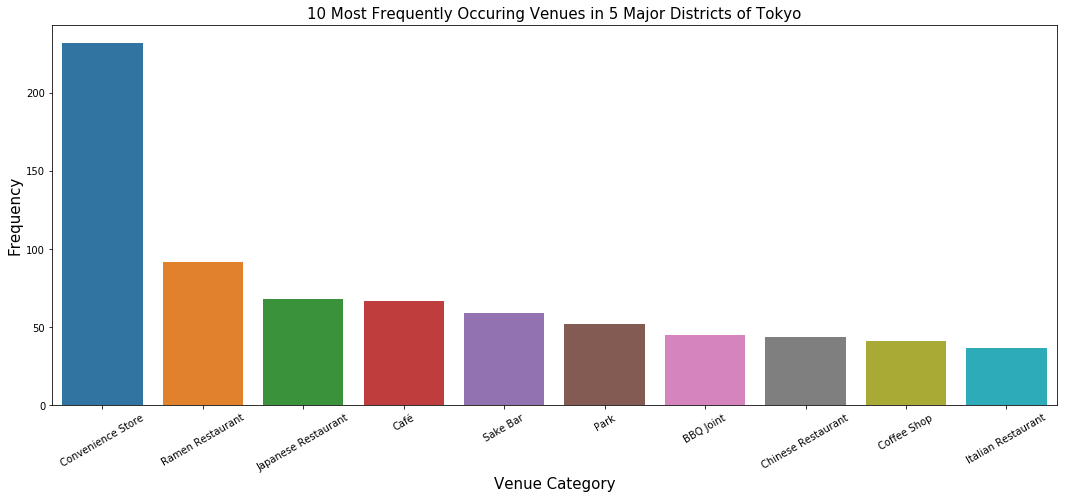

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [188]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Tokyo_onehot = pd.get_dummies(Tokyo_5_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Tokyo_onehot['District'] = Tokyo_5_Venues['District'] 
### move district column to the first column
fixed_columns = [Tokyo_onehot.columns[-1]] + list(Tokyo_onehot.columns[:-1])
Tokyo_onehot = Tokyo_onehot[fixed_columns]
Tokyo_onehot.head()

,District,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
Tokyo_Grouped = Tokyo_onehot.groupby('District').mean().reset_index()
Tokyo_Grouped.index = np.arange(1, len(Tokyo_Grouped)+1)
Tokyo_Grouped.head()

,District,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
1,"Akabane, Ōji, Tabata",0.0,0.0,0.00,0.0,0.00,0.0125,0.0,0.0000,0.0000,...,0.00,0.0,0.0125,0.000000,0.0000,0.00,0.00,0.0125,0.00,0.00
2,"Arakawa, Machiya, Nippori, Minamisenju",0.0,0.0,0.00,0.0,0.00,0.0000,0.0,0.0125,0.0125,...,0.00,0.0,0.0000,0.000000,0.0125,0.00,0.00,0.0000,0.00,0.00
3,"Ayase, Kitasenju, Takenotsuka",0.0,0.0,0.00,0.0,0.00,0.0000,0.0,0.0000,0.0000,...,0.00,0.0,0.0000,0.014706,0.0000,0.00,0.00,0.0000,0.00,0.00
4,"Hongō, Yayoi, Hakusan",0.0,0.0,0.01,0.0,0.00,0.0000,0.0,0.0000,0.0000,...,0.00,0.0,0.0000,0.000000,0.0000,0.01,0.01,0.0000,0.01,0.01
5,"Ikebukuro, Komagome, Senkawa, Sugamo",0.0,0.0,0.00,0.0,0.01,0.0000,0.0,0.0000,0.0200,...,0.01,0.0,0.0100,0.000000,0.0000,0.00,0.00,0.0000,0.00,0.06


In [224]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Tokyo_Grouped['District']

for ind in np.arange(Tokyo_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Akabane, Ōji, Tabata",Restaurant,Hotel,Plaza,Church,History Museum,Coffee Shop,Historic Site,Diner,Breakfast Spot,South American Restaurant
2,"Arakawa, Machiya, Nippori, Minamisenju",Convenience Store,Donburi Restaurant,Sake Bar,Italian Restaurant,Grocery Store,Tram Station,Chinese Restaurant,Shopping Mall,Restaurant,Intersection
3,"Ayase, Kitasenju, Takenotsuka",Convenience Store,Japanese Restaurant,Ramen Restaurant,Restaurant,Café,Fast Food Restaurant,Park,Supermarket,BBQ Joint,Discount Store
4,"Hongō, Yayoi, Hakusan",Convenience Store,Italian Restaurant,Japanese Restaurant,Café,Chinese Restaurant,Ramen Restaurant,BBQ Joint,Park,Supermarket,Donburi Restaurant
5,"Ikebukuro, Komagome, Senkawa, Sugamo",Sake Bar,Café,Ramen Restaurant,Yoshoku Restaurant,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,BBQ Joint,Szechuan Restaurant,Bar


In [225]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 4

Tokyo_grouped_clustering = Tokyo_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:10])

Check the 5 Cluster labels : [2 3 3 3 2 3 3 0 2 0]


In [226]:
#add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Tokyo_5_Dist_Coordinate_Cluster_merged = tokyo

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Major_district')

Tokyo_5_Dist_Coordinate_Cluster_merged

,Name,Population,Area,Major_district,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Minato,"0248,071","12,180","Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,2,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Soba Restaurant,BBQ Joint,Sake Bar,Indian Restaurant,Convenience Store,Coffee Shop,Bar
4,Shinjuku,"0339,211","18,620","Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,2,Bar,Sake Bar,BBQ Joint,Ramen Restaurant,Pub,Rock Club,Record Shop,Yakitori Restaurant,Japanese Restaurant,Tonkatsu Restaurant
5,Bunkyō,"0223,389","19,790","Hongō, Yayoi, Hakusan",35.718810,139.744732,3,Convenience Store,Italian Restaurant,Japanese Restaurant,Café,Chinese Restaurant,Ramen Restaurant,BBQ Joint,Park,Supermarket,Donburi Restaurant
6,Taitō,"0200,486","19,830","Ueno, Asakusa",35.717450,139.790859,2,Coffee Shop,Hostel,BBQ Joint,Dessert Shop,Hotel,Japanese Restaurant,Café,Sukiyaki Restaurant,Ramen Restaurant,Yoshoku Restaurant
7,Sumida,"0260,358","18,910","Kinshichō, Morishita, Ryōgoku",35.700429,139.805017,2,Ramen Restaurant,Coffee Shop,Soba Restaurant,Japanese Restaurant,Café,Sake Bar,Thai Restaurant,Bath House,Bar,BBQ Joint
8,Kōtō,"0502,579","12,510","Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",35.649154,139.812790,0,Convenience Store,Park,Intersection,Plaza,Rest Area,Dessert Shop,Japanese Restaurant,Dog Run,Liquor Store,Noodle House
9,Shinagawa,"0392,492","17,180","Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",35.599252,139.738910,0,Convenience Store,Ramen Restaurant,BBQ Joint,Sake Bar,Park,Sushi Restaurant,Restaurant,Yoshoku Restaurant,Hotel,Soba Restaurant
10,Meguro,"0280,283","19,110","Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",35.621250,139.688014,0,Convenience Store,Café,Japanese Restaurant,Coffee Shop,Ramen Restaurant,Park,Chinese Restaurant,Bakery,Dessert Shop,Grocery Store
11,OtaŌta,"0722,608","11,910","Ōmori, Kamata, Haneda, Den-en-chōfu",-36.967356,174.940723,1,Fast Food Restaurant,Yoshoku Restaurant,Electronics Store,Fried Chicken Joint,French Restaurant,Forest,Food & Drink Shop,Flea Market,Fishing Store,Fishing Spot
12,Setagaya,"0910,868","15,690","Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.656270,0,Convenience Store,Ramen Restaurant,Japanese Restaurant,Tram Station,Sake Bar,Bakery,Café,Trail,Soba Restaurant,Restaurant


In [249]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[35.6828387, 139.7594549],zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['Latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_district'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

4

In [248]:
Tokyo_Cluster1 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Tokyo_Cluster1.shape[0]))
Tokyo_Cluster1

No of Neighbourhood in Cluster Label 0: 7


,Major_district,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",35.649154,139.812790,0,Convenience Store,Park,Intersection,Plaza,Rest Area,Dessert Shop,Japanese Restaurant,Dog Run,Liquor Store,Noodle House
9,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",35.599252,139.738910,0,Convenience Store,Ramen Restaurant,BBQ Joint,Sake Bar,Park,Sushi Restaurant,Restaurant,Yoshoku Restaurant,Hotel,Soba Restaurant
10,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",35.621250,139.688014,0,Convenience Store,Café,Japanese Restaurant,Coffee Shop,Ramen Restaurant,Park,Chinese Restaurant,Bakery,Dessert Shop,Grocery Store
12,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.656270,0,Convenience Store,Ramen Restaurant,Japanese Restaurant,Tram Station,Sake Bar,Bakery,Café,Trail,Soba Restaurant,Restaurant
14,Nakano,35.718123,139.664468,0,Convenience Store,Ramen Restaurant,BBQ Joint,Sake Bar,Park,Italian Restaurant,Café,Japanese Curry Restaurant,Noodle House,Shopping Mall
15,"Kōenji, Asagaya, Ogikubo",35.699493,139.636288,0,Convenience Store,Ramen Restaurant,Café,Japanese Restaurant,Chinese Restaurant,Sake Bar,BBQ Joint,Park,Coffee Shop,Italian Restaurant
20,"Nerima, Ōizumi, Hikarigaoka",35.748360,139.638735,0,Convenience Store,Park,Intersection,Café,Theme Park Ride / Attraction,Italian Restaurant,Chinese Restaurant,Grocery Store,Toy / Game Store,Bakery


In [247]:
Tokyo_Cluster2 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Tokyo_Cluster2.shape[0]))
Tokyo_Cluster2

No of Neighbourhood in Cluster Label 1: 1


,Major_district,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"Ōmori, Kamata, Haneda, Den-en-chōfu",-36.967356,174.940723,1,Fast Food Restaurant,Yoshoku Restaurant,Electronics Store,Fried Chicken Joint,French Restaurant,Forest,Food & Drink Shop,Flea Market,Fishing Store,Fishing Spot


In [246]:
Tokyo_Cluster3 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Tokyo_Cluster2.shape[0]))
Tokyo_Cluster3

No of Neighbourhood in Cluster Label 1: 9


,Major_district,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,2,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,Soba Restaurant,BBQ Joint,Sake Bar,Indian Restaurant,Convenience Store,Coffee Shop,Bar
4,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,2,Bar,Sake Bar,BBQ Joint,Ramen Restaurant,Pub,Rock Club,Record Shop,Yakitori Restaurant,Japanese Restaurant,Tonkatsu Restaurant
6,"Ueno, Asakusa",35.717450,139.790859,2,Coffee Shop,Hostel,BBQ Joint,Dessert Shop,Hotel,Japanese Restaurant,Café,Sukiyaki Restaurant,Ramen Restaurant,Yoshoku Restaurant
7,"Kinshichō, Morishita, Ryōgoku",35.700429,139.805017,2,Ramen Restaurant,Coffee Shop,Soba Restaurant,Japanese Restaurant,Café,Sake Bar,Thai Restaurant,Bath House,Bar,BBQ Joint
13,"Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, S...",35.664596,139.698711,2,Café,Record Shop,Ramen Restaurant,Sushi Restaurant,French Restaurant,Coffee Shop,Wine Bar,Seafood Restaurant,Hotel,Nightclub
16,"Ikebukuro, Komagome, Senkawa, Sugamo",35.736156,139.714222,2,Sake Bar,Café,Ramen Restaurant,Yoshoku Restaurant,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,BBQ Joint,Szechuan Restaurant,Bar
17,"Akabane, Ōji, Tabata",-0.220164,-78.512327,2,Restaurant,Hotel,Plaza,Church,History Museum,Coffee Shop,Historic Site,Diner,Breakfast Spot,South American Restaurant


In [245]:
Tokyo_Cluster4 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 3, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Tokyo_Cluster2.shape[0]))
Tokyo_Cluster4


No of Neighbourhood in Cluster Label 1: 9


,Major_district,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Hongō, Yayoi, Hakusan",35.718810,139.744732,3,Convenience Store,Italian Restaurant,Japanese Restaurant,Café,Chinese Restaurant,Ramen Restaurant,BBQ Joint,Park,Supermarket,Donburi Restaurant
18,"Arakawa, Machiya, Nippori, Minamisenju",35.737529,139.781310,3,Convenience Store,Donburi Restaurant,Sake Bar,Italian Restaurant,Grocery Store,Tram Station,Chinese Restaurant,Shopping Mall,Restaurant,Intersection
19,"Itabashi, Takashimadaira",35.774143,139.681209,3,Convenience Store,Bus Stop,Park,Chinese Restaurant,Intersection,Shopping Mall,Supermarket,Grocery Store,Liquor Store,Noodle House
21,"Ayase, Kitasenju, Takenotsuka",35.783703,139.795319,3,Convenience Store,Japanese Restaurant,Ramen Restaurant,Restaurant,Café,Fast Food Restaurant,Park,Supermarket,BBQ Joint,Discount Store
22,"Tateishi, Aoto, Kameari, Shibamata",35.751733,139.863816,3,Convenience Store,Ramen Restaurant,Park,Donburi Restaurant,Noodle House,Supermarket,Discount Store,Intersection,Sake Bar,Train Station
23,"Kasai, Koiwa",35.678278,139.871091,3,Convenience Store,Intersection,Ramen Restaurant,Park,Restaurant,Grocery Store,Supermarket,Noodle House,Bus Stop,Bakery
